# Train Dataset

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()

root_project_path = os.getenv("ROOTH_PATH")
sys.path.append(root_project_path)
print(root_project_path)

/home/jbct/Projects/thesis/db-ocsvm/


In [2]:
import pandas as pd
from constants.dataset_paths import DATASET

train_set_path = DATASET["sample"]["NSL-KDD"]["train"]
train_dataset = pd.read_csv(train_set_path)
print(f"train set count: {train_dataset.shape[0]:,}")
print(f"unique values: {train_dataset['attack_binary'].unique()}")
train_dataset.head(3)

/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/train_set_pre_feature_selection.csv
train set count: 10,000
unique values: [-1  1]


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
0,-0.11025,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,1.616969,-0.053906,-0.031768,-0.019726,-1.211893,-0.046432,-1,neptune,DoS
1,-0.11025,-0.007754,-0.004900,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal
2,-0.11025,-0.007725,-0.004789,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal


## Splitting into training and validation set

In [3]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_dataset, test_size=0.2, random_state=42)

In [4]:
train_df.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
9254,-0.11025,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,1.616969,-0.053906,-0.031768,-0.019726,-1.211893,-0.046432,-1,neptune,DoS
1561,-0.11025,-0.007706,-0.004448,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal
1670,-0.11025,-0.007716,-0.004612,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal


In [5]:
val_df.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
6252,-0.110250,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,-1.211893,-0.046432,1,normal,normal
4684,-0.107562,-0.007545,-0.004836,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal
1731,-0.110250,-0.007755,-0.004908,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal


#### Train set

In [6]:
X_normal = train_df[train_df["attack_binary"] == 1]

print(f"X_normal count: {X_normal.shape[0]:,}")
print(X_normal["attack_binary"].unique())

X_normal count: 4,256
[1]


In [7]:
X_train = X_normal.drop(
        columns=["attack_binary", "attack_categorical", "attack_class"]
    )

y_train = X_normal["attack_binary"]
print(y_train.unique())

[1]


#### Validation Set

In [8]:
X_val = val_df.drop(columns=["attack_binary", "attack_categorical", "attack_class"])
y_val = val_df["attack_binary"]

print(f"X_val count: {X_val.shape[0]:,}")
print(y_val.unique())

X_val count: 2,000
[ 1 -1]


# Test Dataset

In [9]:
test_set_path = DATASET["sample"]["NSL-KDD"]["test"]

test_dataset = pd.read_csv(test_set_path)
print(f"test set count: {test_dataset.shape[0]:,}")
test_dataset.head(3)

test set count: 500


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
0,-0.11025,-0.007753,-0.004905,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal
1,-0.11025,-0.007762,-0.004908,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,50.693758,-1.211893,-0.046432,-1,processtable,DoS
2,-0.11025,-0.007719,-0.004464,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.139983,-0.618441,-0.053906,-0.031768,-0.019726,0.825156,-0.046432,1,normal,normal


In [10]:
X_test = test_dataset.drop(columns=["attack_binary", "attack_categorical", "attack_class"])

y_test = test_dataset["attack_binary"]
print(y_test.unique())

[ 1 -1]


## Hyperparameter tuning

objective function, maximizing the f1-score

In [11]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
import optuna


def objective(trial):
    nu = trial.suggest_float('nu', 0.01, 0.5)
    
    ocsvm = OneClassSVM(kernel='rbf', nu=nu, gamma="auto")
    ocsvm.fit(X_train)
    
    y_pred = ocsvm.predict(X_val)
    f1 = f1_score(y_val, y_pred, pos_label=1)

    return f1

# Study with storage
# storage_path = "sqlite:////work/study_01_01.db"
# study = optuna.create_study(direction='maximize', storage=storage_path, study_name="study_01_01", load_if_exists=True)
# study.optimize(objective, n_trials=50)

# Study without storage
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(f"Best F1-score: {study.best_value:.3f}")
print(f"Best parameters: {study.best_params}")

/home/jbct/Projects/thesis/db-ocsvm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-03 00:16:56,726] A new study created in memory with name: no-name-18fd8603-6b17-475e-a763-49fbece442be
[I 2025-02-03 00:16:58,518] Trial 0 finished with value: 0.6654205607476635 and parameters: {'nu': 0.473073976564082}. Best is trial 0 with value: 0.6654205607476635.
[I 2025-02-03 00:17:00,046] Trial 1 finished with value: 0.7145421903052065 and parameters: {'nu': 0.40636039146970737}. Best is trial 1 with value: 0.7145421903052065.
[I 2025-02-03 00:17:01,505] Trial 2 finished with value: 0.738696418085731 and parameters: {'nu': 0.3828642879066367}. Best is trial 2 with value: 0.738696418085731.
[I 2025-02-03 00:17:02,980] Trial 3 finished with value: 0.7357268981753973 and parameters: {'nu': 0.38690453

Best F1-score: 0.906
Best parameters: {'nu': 0.11180929221006863}


# Train the final model

In [12]:
best_ocsvm = OneClassSVM(
    kernel='rbf',
    nu=study.best_params['nu'],
    gamma="auto"
)

best_ocsvm.fit(X_train)

OneClassSVM(gamma='auto', nu=0.11180929221006863)

# Test the model

In [13]:
y_pred = best_ocsvm.predict(X_test)

# Evaluate the model

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred,labels=[-1,1])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[236  42]
 [ 25 197]]


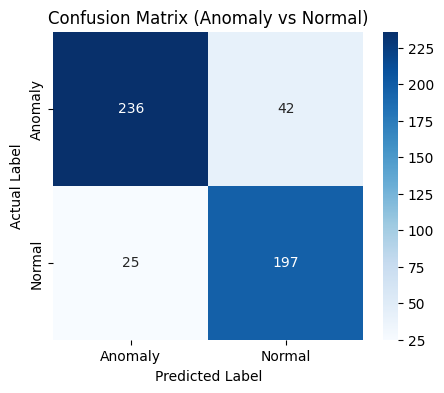

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(cm, ["Anomaly","Normal"], "Confusion Matrix (Anomaly vs Normal)")


In [16]:
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Anomaly", "Normal"]))

precision = precision_score(y_test, y_pred, pos_label=-1)
recall = recall_score(y_test, y_pred, pos_label=-1)
f1 = f1_score(y_test, y_pred, pos_label=-1)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.90      0.85      0.88       278
      Normal       0.82      0.89      0.85       222

    accuracy                           0.87       500
   macro avg       0.86      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

Precision: 0.9042145593869731
Recall: 0.8489208633093526
F1 Score: 0.87569573283859
